## Import the library 

In [4]:
import warnings

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

## Let's create the function 
that is going to help us to clean our data so that we will have the data
that we want to use 

In [5]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
    # subset the properties that are in "Capital Federal"
    mask_ba=df["place_with_parent_names"].str.contains("Capital Federal")
    # subset the properties that are only "apartment"
    mask_ap=df["property_type"]== "apartment"
    # subset the properties that are cost less than $ 400000 in price_aprox_usdabs
    mask_price=df["price_aprox_usd"]< 400000
    df=df[ mask_ba&mask_ap&mask_price]
    # subset the range of area btn 0.1 and 0.9
    low,high=df["surface_covered_in_m2"].quantile([0.1,0.9])
    mask_area=df["surface_covered_in_m2"].between(low,high)
    df=df[mask_area]
    # split "lat-lon"
    df[["lat","lon"]]=df["lat-lon"].str.split(",",expand=True).astype(float)
    df.drop(columns="lat-lon",inplace=True)
    return df

lets use our function to read out data

In [6]:
df=wrangle(r"C:\Users\educa\Downloads\buenos-aires-real-estate-1 (1).csv")
df.head()

,operation,property_type,place_with_parent_names,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...,-34.584651,-58.454693
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...,-34.638979,-58.500115
29,sell,apartment,|Argentina|Capital Federal|Caballito|,118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...,-34.615847,-58.459957
40,sell,apartment,|Argentina|Capital Federal|Constitución|,57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...,-34.625222,-58.382382
41,sell,apartment,|Argentina|Capital Federal|Once|,90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...,-34.610610,-58.412511


In [7]:
# Check your work
assert (
    df.shape[0] == 1343
), f"`df` should have 1343 rows, not {df.shape[0]}."
assert df.shape[1] == 17, f"`df` should have 17 columns, not {df.shape[1]}."

In [8]:
df1=wrangle(r"C:\Users\educa\Downloads\buenos-aires-real-estate-2.csv")
df1.head()

,operation,property_type,place_with_parent_names,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon
2,sell,apartment,|Argentina|Capital Federal|Recoleta|,215000.0,USD,3259916.00,215000.00,40.0,35.0,5375.000000,6142.857143,NaN,1.0,3500.0,http://recoleta.properati.com.ar/12j4v_venta_d...,-34.588993,-58.400133
9,sell,apartment,|Argentina|Capital Federal|Recoleta|,341550.0,USD,5178717.72,341550.00,NaN,90.0,NaN,3795.000000,8.0,2.0,NaN,http://recoleta.properati.com.ar/100t0_venta_d...,-34.588044,-58.398066
12,sell,apartment,|Argentina|Capital Federal|Monserrat|,1386000.0,ARS,1382153.13,91156.62,39.0,33.0,2337.349231,42000.000000,NaN,NaN,NaN,http://monserrat.properati.com.ar/t05l_venta_d...,-34.623320,-58.397461
13,sell,apartment,|Argentina|Capital Federal|Belgrano|,105000.0,USD,1592052.00,105000.00,NaN,33.0,NaN,3181.818182,1.0,1.0,NaN,http://belgrano.properati.com.ar/zsd5_venta_de...,-34.553897,-58.451939
17,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,89681.0,USD,1359779.19,89681.00,46.0,39.0,1949.586957,2299.512821,NaN,1.0,1500.0,http://villa-del-parque.properati.com.ar/12q2f...,-34.628813,-58.472230


In [9]:
# Check your work
assert (
    df1.shape[0] == 1315
), f"`df1` should have 1315 rows, not {df1.shape[0]}."
assert df1.shape[1] == 17, f"`df1` should have 17 columns, not {df1.shape[1]}."

In [10]:
df2=pd.concat([df,df1],ignore_index=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   2658 non-null   object 
 1   property_type               2658 non-null   object 
 2   place_with_parent_names     2658 non-null   object 
 3   price                       2658 non-null   float64
 4   currency                    2658 non-null   object 
 5   price_aprox_local_currency  2658 non-null   float64
 6   price_aprox_usd             2658 non-null   float64
 7   surface_total_in_m2         1898 non-null   float64
 8   surface_covered_in_m2       2658 non-null   float64
 9   price_usd_per_m2            1818 non-null   float64
 10  price_per_m2                2658 non-null   float64
 11  floor                       769 non-null    float64
 12  rooms                       2137 non-null   float64
 13  expenses                    688 n

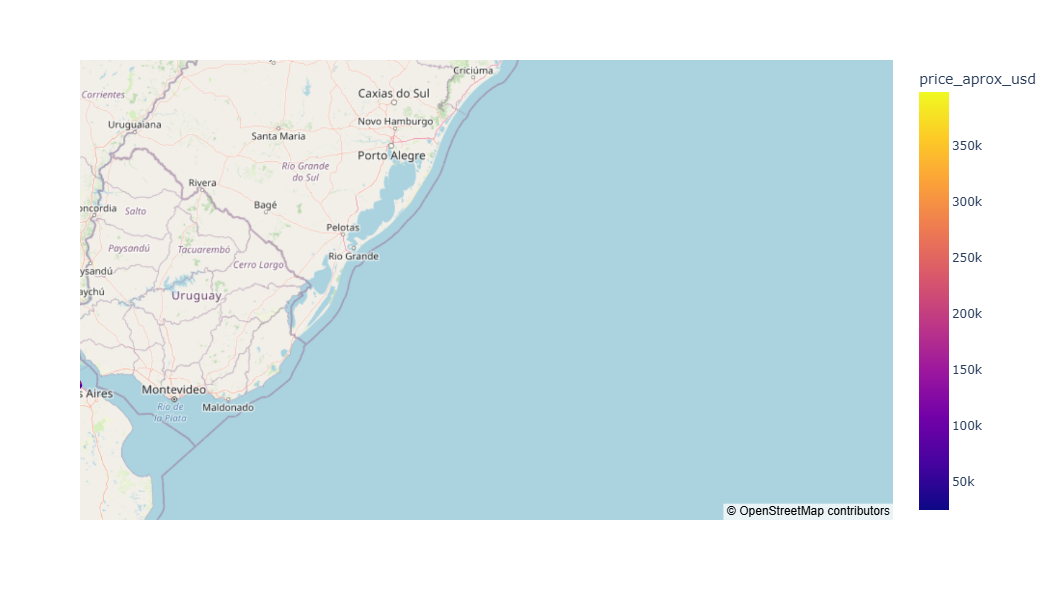

In [27]:
fig= px.scatter_mapbox(
    df2,
    lat='lat',
    lon='lon',
    width=1500,
    height=600,
    color='price_aprox_usd',
    hover_data=['price_aprox_usd'],  # Display price when hovering mouse over house
)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

## split

In [12]:
fig=px.scatter_3d(
    df2,
    x='lat',
    y='lon',
    z='price_aprox_usd',
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()


In [13]:
features=['lat','lon']  
Xtrain=df2[features]
Xtrain.shape

(2658, 2)

In [14]:
target='price_aprox_usd'
Y_train=df2[target]
Y_train.shape

(2658,)

## Modal building 

In [15]:
# Baseline 
y_mean=Y_train.mean()
y_mean

134732.97340481562

In [16]:
y_pred_baseline=[y_mean]*len(Y_train)
y_pred_baseline[:5]

[134732.97340481562,
 134732.97340481562,
 134732.97340481562,
 134732.97340481562,
 134732.97340481562]

In [17]:
mae_y_pred_baseline=mean_absolute_error(Y_train,y_pred_baseline)
mae_y_pred_baseline

45422.75166805662

In [18]:
imputer=SimpleImputer()

In [19]:
imputer.fit(Xtrain)

SimpleImputer()

In [20]:
X_train=imputer.transform(Xtrain)
pd.DataFrame(X_train, columns=Xtrain.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     2658 non-null   float64
 1   lon     2658 non-null   float64
dtypes: float64(2)
memory usage: 41.7 KB


In [22]:
model=make_pipeline(
    SimpleImputer(),
    LinearRegression()
)

### Train The Model

In [23]:
model.fit(Xtrain,Y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

### Evaluate 

In [25]:
y_pred_training=model.predict(Xtrain)

In [26]:
mea_training =mean_absolute_error(Y_train,y_pred_training)
mea_training

42962.72485842105

## 3D Scatter plot modal

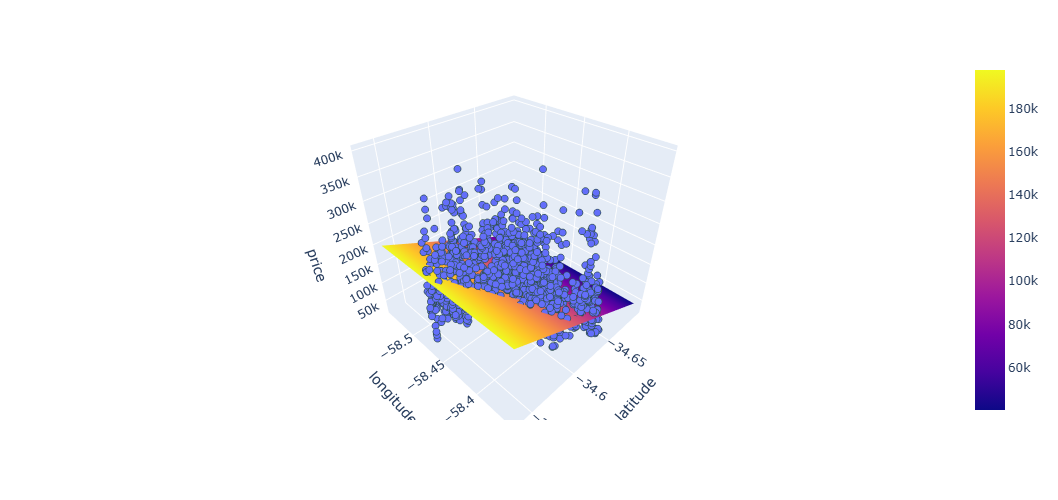

In [29]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df2,
    x= 'lat',
    y= 'lon',
    z= 'price_aprox_usd',
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Create x and y coordinates for model representation
x_plane = np.linspace(df2["lat"].min(), df2["lat"].max(), 10)
y_plane = np.linspace(df2["lon"].min(), df2["lon"].max(), 10)
xx, yy = np.meshgrid(x_plane, y_plane)

# Use model to predict z coordinates
z_plane = model.predict(pd.DataFrame({"lat": x_plane, "lon": y_plane}))
zz = np.tile(z_plane, (10, 1))

# Add plane to figure
fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()